In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [4]:
df.tail()

,index,oh_label,Date,Text
22352,22352,0,20120620000258Z,I dont. But what is complaining about it goi...
22353,22353,0,20120620000258Z,Bahah yeah i&;m totally just gonna&; get pis...
22354,22354,0,20120620000258Z,hahahahaha >:) im evil mwahahahahahahahahaha
22355,22355,0,20120620000258Z,What&;s something unique about Ohio? :)
22356,22356,0,20120620000258Z,Who is the biggest gossiper you know?


In [5]:
df.shape

(22357, 4)

## Preprocessing:

## Removing URLS from the tweets

In [6]:
import re
def remove_url(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',tweet)
example = "This is an example of Cyberbullying tweet https://www.google.com"
remove_url(example)

'This is an example of Cyberbullying tweet '

## Removing Punctuation and Special Characters from the tweet 

In [7]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a @yugendra"
print(remove_punct(example))

I am a yugendra


In [8]:
df['Text']=df['Text'].apply(lambda x : remove_punct(x))

In [9]:
df.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,You fuck your dad
1,1,0,20120528192215Z,i really dont understand your pointxa0 It seem...
2,2,0,NaN,Axc2xa0majority of Canadians can and has been ...
3,3,0,NaN,listen if you dont wanna get married to a man ...
4,4,0,20120619094753Z,Cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...


In [10]:
df.tail()

,index,oh_label,Date,Text
22352,22352,0,20120620000258Z,I dont But what is complaining about it goin...
22353,22353,0,20120620000258Z,Bahah yeah im totally just gonna get pissed ...
22354,22354,0,20120620000258Z,hahahahaha im evil mwahahahahahahahahaha
22355,22355,0,20120620000258Z,Whats something unique about Ohio
22356,22356,0,20120620000258Z,Who is the biggest gossiper you know


## Feature Extraction using TF-IDF Vectorizer

In [11]:
x_train = df['Text']
y_train = df['oh_label']

In [12]:
pd.set_option('display.max_rows', 500)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv= TfidfVectorizer(min_df=1,stop_words='english')

In [14]:
X_train_counts=cv.fit_transform(x_train)


In [15]:
X_train_counts.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
cv.vocabulary_.get(u'algorithm')

## Model Prediction

In [17]:
from sklearn.svm import SVC
clf=SVC(kernel="rbf")
clf.fit(X_train_counts,y_train)
SVM_Model_Accuracy = clf.score(X_train_counts,y_train)

In [18]:
from sklearn.naive_bayes import MultinomialNB
clf1=MultinomialNB()
clf1.fit(X_train_counts,y_train)
clf1.score(X_train_counts,y_train)
Naive_Bayes_Model_Accuracy = clf1.score(X_train_counts,y_train)

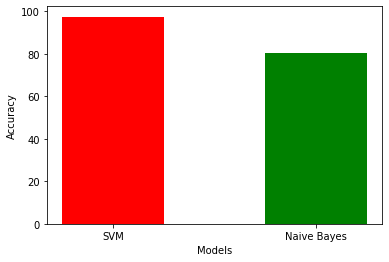

In [23]:
models = ['SVM','Naive Bayes']
accuracy = [SVM_Model_Accuracy*100,Naive_Bayes_Model_Accuracy*100]
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.bar(models,accuracy,tick_label=models,width = 0.5, color = ['red', 'green'])
plt.show()

In [20]:
print(f"SVM Model Accuracy:{SVM_Model_Accuracy}")
print(f"Naive Bayes Model Accuracy:{Naive_Bayes_Model_Accuracy}")

SVM Model Accuracy:0.9747282730241088
Naive Bayes Model Accuracy:0.8030147157489824


In [19]:
import pickle

pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))